<a id="introduction"></a>
# Introduction
Voyons si nous pouvons confirmer une telle relation pour l'endettement *public*.
*NB1 : par souci de lisibilité, certaines fonctions ont été rassemblées dans des scripts et n'apparaissent pas directement dans ce notebook.*
*NB2 : les cartes sont dynamiques, mais ne s'affichent pas correctement sur gitlab.*
<a id="sommaire"></a>
## Sommaire
- [Installation des librairies](#installation)
- [Collecte des données](#collecte)
  - [Données des évènements sportifs](#olympique)
  - [Données de dépenses](#depenses)
  - [Données "nationales"](#nationales)
- [Première agrégation de la base](#premiere)
  - [Création de variables de médailles par athlètes et de dépenses par habitant](par_habitant)
  - [Création de score olympique et paralympique](#score_olympique)
  - [Création de variables de moyenne temporelle de dépenses publiques](#moyennes)
  - [Suppression de certaines lignes et colonnes](#suppression)
- [Choix de la sélection de pays] (#sel_pays)
  - [Présentation de trois bases intéressantes] (#bases)
  - [Variance des variables] (#var)
  - [Valeurs manquantes] (#nan)
- [Statistiques descriptives] (stat_desc)
  - [Moyennes et valeurs extrêmales] (moyenne_extrem)
  - [Nuages de points] (#nuages)
  - [Matrice de corrélation] (#correlation)
- [Analyse] (#analyse)
  - [Regression linéaire entre scores olympiques] (#reg_lin)
  - [ACP entre score paralympiques et statistiques propres au pays] (#ACP)
  - [Conclusions] (#conclusions)
- [Conclusion et perspectives](#suites)


<a id="installation"></a>
## Installation des librairies

In [116]:
!pip install -r requirements.txt

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import io
import matplotlib
import networkx as nx
from PIL import Image
from matplotlib.patches import FancyArrowPatch


In [87]:
from Toutes_les_df_olympiques.df_medailles_olympiques import get_medal_table as get_medal_table_olympic
from Toutes_les_df_olympiques.df_athletes_olympiques import get_athlete_table as get_athlete_table_olympic
from Toutes_les_df_de_depenses.df_depenses_publiques import get_public_expend
from Toutes_les_df_de_depenses.df_education import get_education

<a id="collecte"></a>
## Collecte des données

<a id="olympique"></a>
### Données des évènements sportifs

Dans les données d'évènements sportifs, on cherche à collecter le nombre de médailles de chaque type par édition et par nation ainsi que le nombre d'athètes par nation et par édition.

Nous procédons par scrapping sur Wikipédia. Cependant, les pages Wikipédia des jeux antérieurs à 2012 n'affichent pas le nombre d'athlètes par pays. Nous nous restreindrons alors aux jeux entre 2012 et 2024. 

Les fonctions get_..._table permettent de scrapper les données, ici un exemple pour le nombre de médailles et d'athlètes aux jeux olympiques de Rio 2016.

In [88]:
url_medailles="https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table" #Tableau des médailles des jeux olympiques de 2016

df_medailles = get_medal_table_olympic(2016,url_medailles)
u=0  #u est un compteur qui vérifie qu'on a le df tel qu'il est généré par cette cellule
df_medailles

pays  or_olympique  argent_olympique  \
0                     United States            46                37   
1                     Great Britain            27                23   
2                             China            26                18   
3                           Russia‡            19                17   
4                           Germany            17                10   
5                             Japan            12                 8   
6                            France            10                18   
7                       South Korea             9                 3   
8                             Italy             8                12   
9                         Australia             8                11   
10                      Netherlands             8                 7   
11                          Hungary             8                 3   
12                          Brazil*             7                 6   
13                            Spain             7                 4   
14                            Kenya             6                 6   
15                          Jamaica             6                 3   
16                          Croatia             5                 3   
17                             Cuba             5                 2   
18                      New Zealand             4                 9   
19                           Canada             4                 3   
20                       Uzbekistan             4                 2   
21                        Colombia‡             3                 2   
22                      Switzerland             3                 2   
23                             Iran             3                 1   
24                           Greece             3                 1   
25                        Argentina             3                 1   
26                          Denmark             2                 6   
27                           Sweden             2                 6   
28                     South Africa             2                 6   
29                      Kazakhstan‡             2                 5   
30                          Ukraine             2                 5   
31                           Serbia             2                 4   
32                           Poland             2                 3   
33                      North Korea             2                 3   
34                          Belgium             2                 2   
35                         Thailand             2                 2   
36                         Slovakia             2                 2   
37                          Georgia             2                 1   
38                       Azerbaijan             1                 7   
39                          Belarus             1                 4   
40                           Turkey             1                 3   
41                          Armenia             1                 3   
42                   Czech Republic             1                 2   
43                         Ethiopia             1                 2   
44                         Slovenia             1                 2   
45                        Indonesia             1                 2   
46                         Romania‡             1                 1   
47                          Bahrain             1                 1   
48                          Vietnam             1                 1   
49                   Chinese Taipei             1                 0   
50                          Bahamas             1                 0   
51  Independent Olympic Athletes[D]             1                 0   
52                      Ivory Coast             1                 0   
53                             Fiji             1                 0   
54                           Jordan             1                 0   
55                           Kosovo             1      

In [89]:
url_athletes= "https://en.wikipedia.org/wiki/2016_Summer_Olympics" #Page Wikipedia des athlètes olympiques en 2016

df_athletes = get_athlete_table_olympic(2016,url_athletes)

df_athletes

pays  athletes_olympiques  annee
0                       United States                  554   2016
1                              Brazil                  465   2016
2                             Germany                  425   2016
3                           Australia                  421   2016
4                               China                  413   2016
5                              France                  399   2016
6                       Great Britain                  366   2016
7                               Japan                  338   2016
8                              Canada                  314   2016
9                               Italy                  309   2016
10                              Spain                  306   2016
11                             Russia                  282   2016
12                             Poland                  243   2016
13                        Netherlands                  242   2016
14                          Argentina                  213   2016
15                        South Korea                  205   2016
16                            Ukraine                  203   2016
17                        New Zealand                  199   2016
18                            Hungary                  160   2016
19                             Sweden                  152   2016
20                           Colombia                  147   2016
21                       South Africa                  137   2016
22                             Mexico                  125   2016
23                            Denmark                  122   2016
24                            Belarus                  121   2016
25                               Cuba                  120   2016
26                              Egypt                  120   2016
27                              India                  117   2016
28                            Belgium                  108   2016
29                     Czech Republic                  105   2016
30                         Kazakhstan                  104   2016
31                             Serbia                  104   2016
32                        Switzerland                  104   2016
33                             Turkey                  103   2016
34                            Romania                   97   2016
35                             Greece                   95   2016
36                           Portugal                   92   2016
37                              Kenya                   89   2016
38                            Croatia                   87   2016
39                          Venezuela                   87   2016
40                            Ireland                   77   2016
41                            Nigeria                   75   2016
42                            Austria                   71   2016
43                         Uzbekistan                   70   2016
44                            Jamaica                   68   2016
45                          Lithuania                   67   2016
46                            Algeria                   64   2016
47                               Iran                   64   2016
48                             Norway                   62   2016
49                           Slovenia                   61   2016
50                            Tunisia                   61   2016
51                     Chinese Taipei                   60   2016
52                         Azerbaijan                   56   2016
53                            Finland                   56   2016
54                           Thailand                   54   2016
55                           Bulgaria                   51   2016
56                               Fiji                   51   2016
57                            Morocco                   51   2016
58                           Slovakia                   51   2016
59                             Israel                   48   2016
60     

Chauvins, nous décidons d'avoir une base de données en français, on traduit les noms de pays et corrige des problèmes de typographie avec un dictionnaire (créé par Mistral AI car nous sommes chauvins).

In [90]:
from Toutes_les_df_olympiques.df_medailles_olympiques import countries_en_fr_cio

if u==0 :
    df_medailles["pays"] = (
    df_medailles["pays"].str.replace(r"[^A-Za-z ,\-']", "", regex=True).str.strip()
    )
    df_medailles["pays"] = df_medailles["pays"].map(countries_en_fr_cio)
    u=1

df_medailles.head(-1)
#la dernière ligne est un NaN car "Total"
#n'est pas dans le dictionnaire et le total de médailles ne sera pas utile par la suite

pays  or_olympique  argent_olympique  bronze_olympique  \
0               États-Unis            46                37                38   
1              Royaume-Uni            27                23                17   
2                    Chine            26                18                26   
3                   Russie            19                17                20   
4                Allemagne            17                10                15   
5                    Japon            12                 8                21   
6                   France            10                18                14   
7             Corée du Sud             9                 3                 9   
8                   Italie             8                12                 8   
9                Australie             8                11                10   
10                Pays-Bas             8                 7                 4   
11                 Hongrie             8                 3                 4   
12                  Brésil             7                 6                 6   
13                 Espagne             7                 4                 6   
14                   Kenya             6                 6                 1   
15                Jamaïque             6                 3                 2   
16                 Croatie             5                 3                 2   
17                    Cuba             5                 2                 4   
18        Nouvelle-Zélande             4                 9                 5   
19                  Canada             4                 3                15   
20             Ouzbékistan             4                 2                 7   
21                Colombie             3                 2                 3   
22                  Suisse             3                 2                 2   
23                    Iran             3                 1                 4   
24                   Grèce             3                 1                 2   
25               Argentine             3                 1                 0   
26                Danemark             2                 6                 7   
27                   Suède             2                 6                 3   
28          Afrique du Sud             2                 6                 2   
29              Kazakhstan             2                 5                10   
30                 Ukraine             2                 5                 4   
31                  Serbie             2                 4                 2   
32                 Pologne             2                 3                 6   
33           Corée du Nord             2                 3                 2   
34                Belgique             2                 2                 2   
35               Thaïlande             2                 2                 2   
36               Slovaquie             2                 2                 0   
37                 Géorgie             2                 1                 4   
38             Azerbaïdjan             1                 7                10   
39             Biélorussie             1                 4                 4   
40                 Turquie             1                 3                 4   
41                 Arménie             1                 3                 0   
42      République tchèque             1                 2                 7   
43                Éthiopie             1                 2                 5   
44                Slovénie             1                 2                 1   
45               Indonésie             1                 2                 0   
46                Roumanie             1                 1                 2   
47                 Bahreïn             1                 1                 0   
48                Viêt Nam             1                 1                 0   
49                  Ta

<a id="depenses"></a>
### Données de dépenses

Afin d'expliquer les différences de succès paralympique, nous collectons les données de dépenses publiques dans certains secteurs :  
    - Les loisirs et le sport (construction d'équipements sportifs, subventions aux associations sportives, organisation d'évènements...). Ces dépenses paraissent très liées à la culture du sport et donc à la réussite sportive.   
    - La gestion des maladies et de l'invalidité (soins hospitaliers, construction d'hôpitaux, constructions d'équipements d'aide aux handicapés...). Il semble aussi logique que des dispositifs d'aide aux malades et aux handicapés améliorent la réussite aux jeux paralympiques. Cependant, l'immense majorité de ces dépenses va dans les soins hospitaliers ce qui rend moins évident sa contribution à la réussite paralympique.  
    - L'aménagement du territoire (construction de routes, urbanisme, aménagement de zones commerciales...). Ces dépenses limitent l'isolement des zones peu densément peuplées et peuvent détecter plus facilement les athlètes à haut potentiel.  
    - L'éducation (construction d'écoles, salaire des professeurs, financement des écoles publiques...). Cette variable est mentionnée dans cet article comme un déterminant de la réussite olympique, essayons donc de voir si ce résultat persiste au niveau paralympique.  

https://medium.com/@mmvillar/is-the-distribution-of-olympic-medals-truly-fair-378e509bf80e

Pour collecter les données de dépense en aménagement du territoire/ loisirs et sports et maladie et invalidité, on utilise l'API de Eurostat.

Chacun de ces secteurs est associé à un numéro GF.... et donne la part du PIB investie dans le secteur.

Nous n'avons accès à ces données que pour les pays européens ce qui posera problème dans le choix des pays sélectionnés dans la base de données finales.

In [91]:
from eurostat import get_data_df
from Toutes_les_df_de_depenses.df_depenses_publiques import pays_dict
from Toutes_les_df_de_depenses.df_depenses_publiques import cofog_labels


df_depenses = get_public_expend()
df_depenses['pays'] = df_depenses['pays'].map(pays_dict)
df_depenses['cofog99'] = df_depenses['cofog99'].map(cofog_labels)
df_depenses.rename(columns={'cofog99': 'type_depense'}, inplace=True)

df_depenses = df_depenses.pivot_table(
    index=['pays', 'annee'],
    columns='type_depense',
    values='depense', 
    aggfunc='first'
).reset_index()

df_depenses

type_depense                pays annee  amenagement_territoire  \
0                      Allemagne  2000                     0.2   
1                      Allemagne  2001                     0.2   
2                      Allemagne  2002                     0.2   
3                      Allemagne  2003                     0.2   
4                      Allemagne  2004                     0.2   
5                      Allemagne  2005                     0.2   
6                      Allemagne  2006                     0.2   
7                      Allemagne  2007                     0.2   
8                      Allemagne  2008                     0.2   
9                      Allemagne  2009                     0.2   
10                     Allemagne  2010                     0.2   
11                     Allemagne  2011                     0.2   
12                     Allemagne  2012                     0.2   
13                     Allemagne  2013                     0.2   
14                     Allemagne  2014                     0.2   
15                     Allemagne  2015                     0.2   
16                     Allemagne  2016                     0.2   
17                     Allemagne  2017                     0.2   
18                     Allemagne  2018                     0.2   
19                     Allemagne  2019                     0.2   
20                     Allemagne  2020                     0.2   
21                     Allemagne  2021                     0.2   
22                     Allemagne  2022                     0.2   
23                     Allemagne  2023                     0.2   
24                      Autriche  1995                     0.0   
25                      Autriche  1996                     0.0   
26                      Autriche  1997                     0.0   
27                      Autriche  1998                     0.0   
28                      Autriche  1999                     0.0   
29                      Autriche  2000                     0.0   
30                      Autriche  2001                     0.0   
31                      Autriche  2002                     0.0   
32                      Autriche  2003                     0.0   
33                      Autriche  2004                     0.0   
34                      Autriche  2005                     0.0   
35                      Autriche  2006                     0.0   
36                      Autriche  2007                     0.0   
37                      Autriche  2008                     0.0   
38                      Autriche  2009                     0.0   
39                      Autriche  2010                     0.0   
40                      Autriche  2011                     0.0   
41                      Autriche  2012                     0.0   
42                      Autriche  2013                     0.0   
43                      Autriche  2014                     0.0   
44                      Autriche  2015                     0.0   
45                      Autriche  2016                     0.0   
46                      Autriche  2017                     0.0   
47                      Autriche  2018                     0.0   
48                      Autriche  2019                     0.0   
49                      Autriche  2020                     0.0   
50                      Autriche  2021                     0.0   
51                      Autriche  2022                     0.0   
52                      Autriche  2023                     0.0   
53                      Autriche  2024                     0.0   
54                      Belgique  2001                     0.2   
55                      Belgique  2002                     0.2   
56                      Belgique  2003                     0.1   
57                      Belgique  2004                     0.1   
58                      Belgique  2005                     0.1   
59                      Belgique  2006  

Pour l'éducation, nous y avons accès depuis l'API de la World Bank Data. Ces données concernent la plupart des pays du monde.

La table comporte aussi la dépense d'éducation dans des régions du monde (Monde Arabe, Hauts revenus, Asie Centrale ...). Elles seront supprimées lors de la jointure de toutes les tables.

In [92]:
import world_bank_data
from Toutes_les_df_de_depenses.df_education import country_mapping

df_education=get_education()

df_education['pays'] = df_education['pays'].replace(country_mapping)

df_education


pays  annee  education
0                         Afrique orientale et australe   2010   4.024030
1                         Afrique orientale et australe   2011   4.639015
2                         Afrique orientale et australe   2012   4.676120
3                         Afrique orientale et australe   2013   4.637694
4                         Afrique orientale et australe   2014   4.659660
5                         Afrique orientale et australe   2015   4.737919
6                         Afrique orientale et australe   2016   4.692000
7                         Afrique orientale et australe   2017   4.430510
8                         Afrique orientale et australe   2018   4.739750
9                         Afrique orientale et australe   2019   4.511410
10                        Afrique orientale et australe   2020   4.090565
11                        Afrique orientale et australe   2021   4.368379
12                        Afrique orientale et australe   2022   3.697668
13                        Afrique orientale et australe   2023   3.962293
14                      Afrique occidentale et centrale   2010   2.848030
15                      Afrique occidentale et centrale   2011   2.653370
16                      Afrique occidentale et centrale   2012   2.688400
17                      Afrique occidentale et centrale   2013   2.940210
18                      Afrique occidentale et centrale   2014   2.666670
19                      Afrique occidentale et centrale   2015   3.138830
20                      Afrique occidentale et centrale   2016   2.615035
21                      Afrique occidentale et centrale   2017   3.296630
22                      Afrique occidentale et centrale   2018   3.051252
23                      Afrique occidentale et centrale   2019   3.047399
24                      Afrique occidentale et centrale   2020   3.398741
25                      Afrique occidentale et centrale   2021   3.096926
26                      Afrique occidentale et centrale   2022   2.891687
27                      Afrique occidentale et centrale   2023   3.215620
28                                          Monde arabe   2010        NaN
29                                          Monde arabe   2011        NaN
30                                          Monde arabe   2012        NaN
31                                          Monde arabe   2013        NaN
32                                          Monde arabe   2014        NaN
33                                          Monde arabe   2015        NaN
34                                          Monde arabe   2016        NaN
35                                          Monde arabe   2017        NaN
36                                          Monde arabe   2018        NaN
37                                          Monde arabe   2019   3.424335
38                                          Monde arabe   2020   3.768607
39                                          Monde arabe   2021        NaN
40                                          Monde arabe   2022        NaN
41                                          Monde arabe   2023        NaN
42                            Petits États des Caraïbes   2010   4.211555
43                            Petits États des Caraïbes   2011   3.850788
44                            Petits États des Caraïbes   2012   3.573980
45                            Petits États des Caraïbes   2013   3.752759
46                            Petits États des Caraïbes   2014   3.590138
47                            Petits États des Caraïbes   2015   4.424593
48                            Petits États des Caraïbes   2016   4.214282
49                            Petits États des Caraïbes   2017   3.329369
50                            Petits États des Caraïbes   2018   3.471418
51                            Petits États des Caraïbes   2019   3.553861
52                            Petits États des Caraïbes   2020   4.257670
53                            Petits États des Caraïbes

<a id="nationales"></a>
### Données "nationales"

Reste enfin les données que nous qualifierons de "nationales" : le PIB par habitant et l'IDH.

Les données sont collectées grâce à un csv et un excel. Nous n'avons pris ces variables que depuis 2008; nous nous servirons de ces variables sans faire de calculs nécessitant les années d'avant.

Par souci de lisibilité, on ne détaillera pas leur collecte qui est presque similaire à celles précédentes.

In [93]:
df_pib_par_habitant=pd.read_pickle('Toutes_les_df_nationales/df_pib_par_habitant.pkl')
df_pib_par_habitant

pays  annee   pib_habitant
0                                                 Aruba   2008   28171.909401
1                                                   NaN   2008    1421.118613
2                                           Afghanistan   2008     381.733238
3                                                   NaN   2008    1668.841082
4                                                Angola   2008    4103.066900
5                                               Albanie   2008    4498.504868
6                                               Andorre   2008   49132.515708
7                                        Le monde arabe   2008    6091.932064
8                                   Émirats arabes unis   2008   50054.170068
9                                             Argentine   2008    8944.110266
10                                              Arménie   2008    3777.668593
11                                    Samoa américaines   2008   10030.808913
12                                   Antigua-et-Barbuda   2008   18786.674314
13                                            Australie   2008   49701.281784
14                                             Autriche   2008   51581.398236
15                                          Azerbaïdjan   2008    5574.468104
16                                              Burundi   2008     189.502075
17                                             Belgique   2008   48303.397956
18                                                Bénin   2008    1060.602545
19                                         Burkina Faso   2008     619.437533
20                                           Bangladesh   2008     613.062041
21                                             Bulgarie   2008    7271.303389
22                                              Bahreïn   2008   23299.499278
23                                              Bahamas   2008   29392.382442
24                                   Bosnie-Herzégovine   2008    4841.693119
25                                              Bélarus   2008    6376.175692
26                                               Belize   2008    5713.281268
27                                             Bermudes   2008  110268.562401
28                                              Bolivie   2008    1692.672485
29                                               Brésil   2008    8908.331765
30                                              Barbade   2008   17565.692997
31                                               Brunei   2008   42156.568522
32                                              Bhoutan   2008    1919.597749
33                                             Botswana   2008    5503.073953
34                            République centrafricaine   2008     437.248275
35                                               Canada   2008   46710.252686
36                   Europe centrale et les pays baltes   2008   14573.745666
37                                               Suisse   2008   74175.192790
39                                                Chili   2008   10683.218877
40                                                Chine   2008    3523.443021
41                                        Côte d'Ivoire   2008    1583.970667
42                                             Cameroun   2008    1492.142698
43                    Congo, République démocratique du   2008     307.319639
44                                 Congo, République du   2008    2832.091778
45                                             Colombie   2008    5541.836297
46                                              Comores   2008    1455.027686
47                                             Cap Vert   2008    3908.648858
48                                           Costa Rica   2008    6937.242616
49                            Petits états des Caraïbes   2008   13890.238528
50                                                 Cuba   2008    4986.124365
51                                              Curacao   2008   19423.33

Les pays avec un NaN sont les régions du monde qui ne sont transformées en NaN à la traduction du DataFrame.

Pour l'IDH on a toujours les NaN qui sont les régions du monde, on dispose de cette table :

In [94]:
df_idh=pd.read_pickle('Toutes_les_df_nationales/df_idh.pkl')
df_idh

pays  annee    idh
0                          Afghanistan   2008  0.446
1                              Albanie   2008  0.749
2                              Algérie   2008  0.711
3                              Andorre   2008  0.864
4                               Angola   2008  0.504
5                   Antigua-et-Barbuda   2008  0.830
6                            Argentine   2008  0.833
7                              Arménie   2008  0.743
8                            Australie   2008  0.924
9                             Autriche   2008  0.907
10                         Azerbaïdjan   2008  0.731
11                             Bahamas   2008  0.801
12                             Bahreïn   2008  0.804
13                          Bangladesh   2008  0.538
14                             Barbade   2008  0.794
15                         Biélorussie   2008  0.796
16                            Belgique   2008  0.917
17                              Belize   2008  0.720
18                               Bénin   2008  0.475
19                             Bolivie   2008  0.668
20                  Bosnie-Herzégovine   2008  0.719
21                            Botswana   2008  0.645
22                              Brésil   2008  0.739
23                              Brunei   2008  0.824
24                            Bulgarie   2008  0.791
25                        Burkina Faso   2008  0.357
26                             Burundi   2008  0.401
27                            Cap-Vert   2008  0.643
28                            Cambodge   2008  0.539
29                            Cameroun   2008  0.501
30                              Canada   2008  0.916
31           République centrafricaine   2008  0.362
32                               Tchad   2008  0.354
33                               Chili   2008  0.820
34                               Chine   2008  0.689
35                            Colombie   2008  0.731
36                             Comores   2008  0.519
37                               Congo   2008  0.591
38    République démocratique du Congo   2008  0.426
39                          Costa Rica   2008  0.769
40                             Croatie   2008  0.827
41                                Cuba   2008  0.788
42                              Chypre   2008  0.862
43                  République tchèque   2008  0.873
44                       Côte d’Ivoire   2008  0.452
45                            Danemark   2008  0.922
46                            Djibouti   2008  0.400
47                           Dominique   2008  0.745
48              République dominicaine   2008  0.704
49                            Équateur   2008  0.729
50                              Égypte   2008  0.665
51                            Salvador   2008  0.653
52                  Guinée équatoriale   2008  0.613
53                            Érythrée   2008  0.457
54                             Estonie   2008  0.864
55                            Eswatini   2008  0.507
56                            Éthiopie   2008  0.398
57                               Fidji   2008  0.690
58                            Finlande   2008  0.921
59                              France   2008  0.884
60                               Gabon   2008  0.675
61                              Gambie   2008  0.455
62                             Géorgie   2008  0.757
63                           Allemagne   2008  0.933
64                               Ghana   2008  0.546
65                               Grèce   2008  0.871
66                             Grenade   2008  0.771
67                           Guatemala   2008  0.609
68                              Guinée   2008  0.422
69                       Guinée-Bissau   2008  0.436
70                              Guyana   2008  0.632
71                               Haïti   2008  0.528
72                            Honduras   2008  0.592
73                           Hong Kong   2008  0.907
74                             Hongrie   2008  0.833
75    

<a id="premiere"></a>
## Première agrégation de la base

On commence évidemment par joindre toutes les tables présentées plus tôt sur le couple (pays,annee).

In [95]:
from Toutes_les_df_olympiques.df_medailles_paralympiques import df_para as df_medailles_paralympiques
from Toutes_les_df_olympiques.df_athletes_paralympiques import df_para as df_athletes_paralympiques
from Toutes_les_df_olympiques.df_medailles_olympiques import df_medailles as df_medailles_olympiques
from Toutes_les_df_olympiques.df_athletes_olympiques import df_athletes as df_athletes_olympiques
from Toutes_les_df_de_depenses.df_depenses_publiques import df_longue as df_depenses_publiques

df_merge = df_medailles_olympiques.merge(
    df_medailles_paralympiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_athletes_olympiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_athletes_paralympiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_depenses_publiques, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_education, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_idh, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge = df_merge.merge(
    df_pib_par_habitant, 
    on=['pays', 'annee'], 
    how='outer'
)

df_merge.query("pays == 'France' and annee.isin([2012,2016,2020,2024])")

pays  or_olympique  argent_olympique  bronze_olympique  \
1883  France          11.0              11.0              13.0   
1887  France          10.0              18.0              14.0   
1891  France          10.0              12.0              11.0   
1895  France          16.0              26.0              22.0   

      total_medailles_olympiques annee  or_paralympique  argent_paralympique  \
1883                        35.0  2012              8.0                 19.0   
1887                        42.0  2016              9.0                  5.0   
1891                        33.0  2020             11.0                 15.0   
1895                        64.0  2024             19.0                 28.0   

      bronze_paralympique  total_medailles_paralympiques  athletes_olympiques  \
1883                 18.0                           45.0                324.0   
1887                 14.0                           28.0                399.0   
1891                 29.0                           55.0                398.0   
1895                 28.0                           75.0                573.0   

     athletes_paralympiques  amenagement_territoire  loisirs_sports  \
1883                    158                     0.7             0.6   
1887                    126                     0.6             0.5   
1891                    137                     0.6             0.5   
1895                    239                     NaN             NaN   

      maladie_invalidite  education    idh  pib_habitant  
1883                 2.7        NaN  0.893  40863.581441  
1887                 2.8        NaN  0.905  37024.215713  
1891                 3.1    5.65872  0.909  39169.860600  
1895                 NaN        NaN    NaN  46150.487686

<a id="par_habitant"></a>
### Création de variables de médailles par athlètes et de dépenses par habitant

Sans ramener les variables au nombre d'athlètes, l'étude n'aurait que peu d'intérêt, on ramène donc les variables sportives au nombre d'athlètes présents et les variables de dépenses en valeur absolue par habitant.

Ici le nombre de médailles par athlète aux jeux paralympiques:

In [96]:
df_merge['athletes_olympiques'] = pd.to_numeric(df_merge['athletes_olympiques'], errors='coerce')
df_merge['athletes_paralympiques'] = pd.to_numeric(df_merge['athletes_paralympiques'], errors='coerce')
df_merge["annee"] = pd.to_numeric(df_merge["annee"], errors='coerce')

df_merge['or_paralympique_par_athlete'] = df_merge['or_paralympique'] / df_merge['athletes_paralympiques']
df_merge['argent_paralympique_par_athlete'] = df_merge['argent_paralympique'] / df_merge['athletes_paralympiques']
df_merge['bronze_paralympique_par_athlete'] = df_merge['bronze_paralympique'] / df_merge['athletes_paralympiques']
df_merge['total_medailles_paralympiques_par_athlete'] = df_merge['total_medailles_paralympiques'] / df_merge['athletes_paralympiques']

df_merge.query("pays == 'France' and annee.isin([2012,2016,2020,2024])")[['pays','annee', 'or_paralympique_par_athlete',
'argent_paralympique_par_athlete','bronze_paralympique_par_athlete','total_medailles_paralympiques_par_athlete']]

pays   annee  or_paralympique_par_athlete  \
1883  France  2012.0                     0.050633   
1887  France  2016.0                     0.071429   
1891  France  2020.0                     0.080292   
1895  France  2024.0                     0.079498   

      argent_paralympique_par_athlete  bronze_paralympique_par_athlete  \
1883                         0.120253                         0.113924   
1887                         0.039683                         0.111111   
1891                         0.109489                         0.211679   
1895                         0.117155                         0.117155   

      total_medailles_paralympiques_par_athlete  
1883                                   0.284810  
1887                                   0.222222  
1891                                   0.401460  
1895                                   0.313808

Et ici les dépenses par habitant dans chaque secteur :

In [97]:
df_merge['amenagement_territoire_par_habitant'] = df_merge['amenagement_territoire'] * df_merge['pib_habitant']
df_merge['loisirs_sports_par_habitant'] = df_merge['loisirs_sports'] * df_merge['pib_habitant']
df_merge['maladie_invalidite_par_habitant'] = df_merge['maladie_invalidite'] * df_merge['pib_habitant']
df_merge['education_par_habitant'] = df_merge['education'] * df_merge['pib_habitant']

df_merge.query("pays == 'France' and annee.isin([2012,2016,2020,2024])")[['pays','annee', 'amenagement_territoire_par_habitant',
'loisirs_sports_par_habitant','maladie_invalidite_par_habitant','education_par_habitant']]

pays   annee  amenagement_territoire_par_habitant  \
1883  France  2012.0                         28604.507009   
1887  France  2016.0                         22214.529428   
1891  France  2020.0                         23501.916360   
1895  France  2024.0                                  NaN   

      loisirs_sports_par_habitant  maladie_invalidite_par_habitant  \
1883                 24518.148865                    110331.669891   
1887                 18512.107857                    103667.803997   
1891                 19584.930300                    121426.567860   
1895                          NaN                              NaN   

      education_par_habitant  
1883                     NaN  
1887                     NaN  
1891            221651.27422  
1895                     NaN

<a id="score_olympique"></a>
### Création de score olympique et paralympique

Pour évaluer la performance sportive, deux variables sont immédiates : le total de médailles et le classement aux Jeux.

Cependant, le classement aux Jeux valorise trop les médailles d'or (avoir une médaille d'or et zéro médailles d'argent nous place devant un pays avec zéro médailles d'or et dix d'argent) et le total de médailles pas assez.

Nous créons donc un score olympique et paralympique rapportant trois points par médaille d'or, deux par médaille d'argent, un par médaille de bronze le tout ramené au nombre d'athlètes.

Ici la table pour le score paralympique en 2016 :

In [98]:
df_merge['score_paralympique'] = (3 * df_merge['or_paralympique_par_athlete'] + 
                                 2 * df_merge['argent_paralympique_par_athlete'] + 
                                 df_merge['bronze_paralympique_par_athlete'])

df_merge.query("annee==2016")[['pays','annee','score_paralympique','total_medailles_paralympiques_par_athlete']].sort_values(by='score_paralympique', ascending=False) \
        .head(10)

pays   annee  score_paralympique  \
3528            Ouganda  2016.0            2.000000   
5027  Trinité-et-Tobago  2016.0            2.000000   
1178              Chine  2016.0            1.733766   
3545        Ouzbékistan  2016.0            1.656250   
736             Bahreïn  2016.0            1.500000   
1436               Cuba  2016.0            1.454545   
3477   Nouvelle-Zélande  2016.0            1.419355   
5112            Ukraine  2016.0            1.404762   
4015              Qatar  2016.0            1.333333   
862         Biélorussie  2016.0            1.300000   

      total_medailles_paralympiques_par_athlete  
3528                                   1.000000  
5027                                   1.000000  
1178                                   0.775974  
3545                                   0.968750  
736                                    0.500000  
1436                                   0.681818  
3477                                   0.677419  
5112                                   0.696429  
4015                                   0.666667  
862                                    0.500000

Ne raisonner que par le score va poser un problème : surreprésenter les pays ayant un athlète exceptionnel mais aucun autre athlète disputant les Jeux. L'Ouganda montre ce problème. Il faudra en prendre compte lors de la sélection des pays.

<a id="moyennes"></a>
### Création d'une moyenne depuis 2008 pour chaque dépense publique

Le problème de considérer une dépense publique à un instant t est qu'un pays bénéficie généralement des investissements faits précédemment. On utilisera donc plutôt des variables de moyenne des dépenses publiques depuis 2008.

De plus, cette méthode réduit le nombre de NaN. Par exemple, il n'y a pas de valeur d'éducation de la France en 2024 mais bien une valeur de moyenne d'éducation.

In [99]:
from Toutes_les_df_agregees.fonction_moyenne import creation_moyenne

creation_moyenne(df_merge)

u_2=0 #Sert à pouvoir rééxécuter la cellule suivante
df_merge.query("pays == 'France' and annee==2024")[['pays','annee','moy_amenagement_2008','moy_loisirs_2008',
'moy_maladie_2008','moy_education_2008']]

pays   annee  moy_amenagement_2008  moy_loisirs_2008  \
1895  France  2024.0            27759.0728      23039.075135   

      moy_maladie_2008  moy_education_2008  
1895     114870.896502       221707.363482

<a id="suppression"></a>
### Suppression de certaines lignes et colonnes

N disposons désormais d'une base de données avec de nombreuses colonnes et observations. Cependant, il convient de restreindre nos observations et nos variables. 

On supprime donc les variables non ramenées au nombre d'athlètes / habitants, cela n'a pas vraiment de sens de comparer ces variables entre les pays.

On supprime aussi les pays n'ayant jamais ramené un seul athlète aux Jeux Olympiques notamment pour enlever les régions (Afrique du Nord, Haut Revenu etc...) issues de la collecte des données.

On garde cependant les années non olympiques et les variables à un instant t qui seront utiles aux statistiques descriptives.

In [100]:
if u_2==0:
    #Suppression des pays n'ayant jamais amené d'athlètes aux jeux olympiques (permet surtout d'enlever les groupes de pays présents dans certaines bases : Afrique du Nord, etc...)
    df_merge = df_merge[df_merge.groupby('pays')['athletes_olympiques'].transform('sum') > 0]

    #Suppression des variables non ramenées au nombre d'athlètes/habitants
    df_merge = df_merge.drop('or_olympique', axis=1)
    df_merge = df_merge.drop('argent_olympique', axis=1)
    df_merge = df_merge.drop('bronze_olympique', axis=1)
    df_merge = df_merge.drop('total_medailles_olympiques', axis=1)
    df_merge = df_merge.drop('or_paralympique', axis=1)
    df_merge = df_merge.drop('argent_paralympique', axis=1)
    df_merge = df_merge.drop('bronze_paralympique', axis=1)
    df_merge = df_merge.drop('total_medailles_paralympiques', axis=1)
    df_merge = df_merge.drop('amenagement_territoire', axis=1)
    df_merge = df_merge.drop('maladie_invalidite', axis=1)
    df_merge = df_merge.drop('loisirs_sports', axis=1)
    df_merge = df_merge.drop('education', axis=1)

df_merge.query("pays == 'France' and annee == 2020") #NB Dans ce notebook, on n'a pas créé la variable de score olympique, mais elle est bien dans le code

pays   annee  athletes_olympiques  athletes_paralympiques    idh  \
1891  France  2020.0                398.0                   137.0  0.909   

      pib_habitant  or_paralympique_par_athlete  \
1891    39169.8606                     0.080292   

      argent_paralympique_par_athlete  bronze_paralympique_par_athlete  \
1891                         0.109489                         0.211679   

      total_medailles_paralympiques_par_athlete  \
1891                                    0.40146   

      amenagement_territoire_par_habitant  loisirs_sports_par_habitant  \
1891                          23501.91636                   19584.9303   

      maladie_invalidite_par_habitant  education_par_habitant  \
1891                     121426.56786            221651.27422   

      score_paralympique  moy_education_2008  moy_loisirs_2008  \
1891            0.671533       217658.521862      22976.122834   

      moy_amenagement_2008  moy_maladie_2008  
1891          27491.456041     111776.827818

<a id="sel_pays"></a>
## Quels pays sélectionner pour l'analyse ?

Nous avons désormais une base très grande, utilisons des statistiques descriptives pour déterminer quels pays nous permettrons de faire l'analyse la plus pertinente.

<a id="bases"></a>
### Le problème de table avec tous les pays : la variance des variables explicatives

Si la table df_tous_pays contient plusieurs milliers d'observations, il reste un problème important. Les variables explicatives (PIB par habitant, IDH, dépenses par habitant) sont extrêmement variables.

Regardons le coefficient de variation, nommé ici Quotient, de cette table.

In [101]:
from statistiques_descriptives.Stat_descr import quotient

df_tous_pays=pd.read_pickle("Toutes_les_df_agregees/df_tous_pays.pkl")

df_quotient_tous_pays=quotient(df_tous_pays,df_tous_pays)

df_quotient_tous_pays

Variable       Moyenne  Quotient (%)  \
0     total_medailles_olympiques_par_athlete      0.103038     74.816645   
1  total_medailles_paralympiques_par_athlete      0.349923     57.916799   
2                       moy_amenagement_2008   7889.104386    111.846878   
3                           moy_maladie_2008  97492.726820     89.940841   
4                           moy_loisirs_2008  13512.757851     84.672868   
5                         moy_education_2008  76958.713671    146.834144   
6                               pib_habitant  17783.190239    155.304385   
7                                        idh      0.718348     21.451897   

   Observations  
0           357  
1           328  
2           104  
3           104  
4           104  
5           628  
6          3119  
7          3064

Il est inadmissible d'utiliser une base dont l'écart-type de certaines variables est supérieur à leur moyenne.

On essaie donc de prendre les dix pays les plus riches (en terme de PIB par habitant) pour avoir a priori des variables un peu moins volatiles. On fait aussi attention à ne sélectionner des pays ayant amené au moins cinq athlètes en moyenne au cours des quatre précédents jeux paralympiques.

On observe ensuite leur Quotient de variation défini comme l'écart-type sur la table divisé par la moyenne de df_tous_pays.

In [102]:
df_top_10=pd.read_pickle('Toutes_les_df_agregees/df_top_10.pkl')

pays = df_top_10['pays'].unique()
print(f"Les pays de cette nouvelle table sont : \n{', '.join(pays)}")

df_cv_top_10=quotient(df_top_10,df_tous_pays)

df_cv_top_10

Les pays de cette nouvelle table sont : 
Australie, Danemark, Irlande, Islande, Norvège, Pays-Bas, Singapour, Suisse, Suède, États-Unis


Variable        Moyenne  Quotient (%)  \
0     total_medailles_olympiques_par_athlete       0.093922     47.036974   
1  total_medailles_paralympiques_par_athlete       0.370660     48.695311   
2                       moy_amenagement_2008    7989.719225     68.723454   
3                           moy_maladie_2008  240282.551695     59.338951   
4                           moy_loisirs_2008   24633.244311     73.923415   
5                         moy_education_2008  372972.166098    175.068831   
6                               pib_habitant   66199.947643     91.922149   
7                                        idh       0.942431      2.189008   

   Observations  
0            35  
1            37  
2            16  
3            16  
4            16  
5            36  
6           170  
7           160

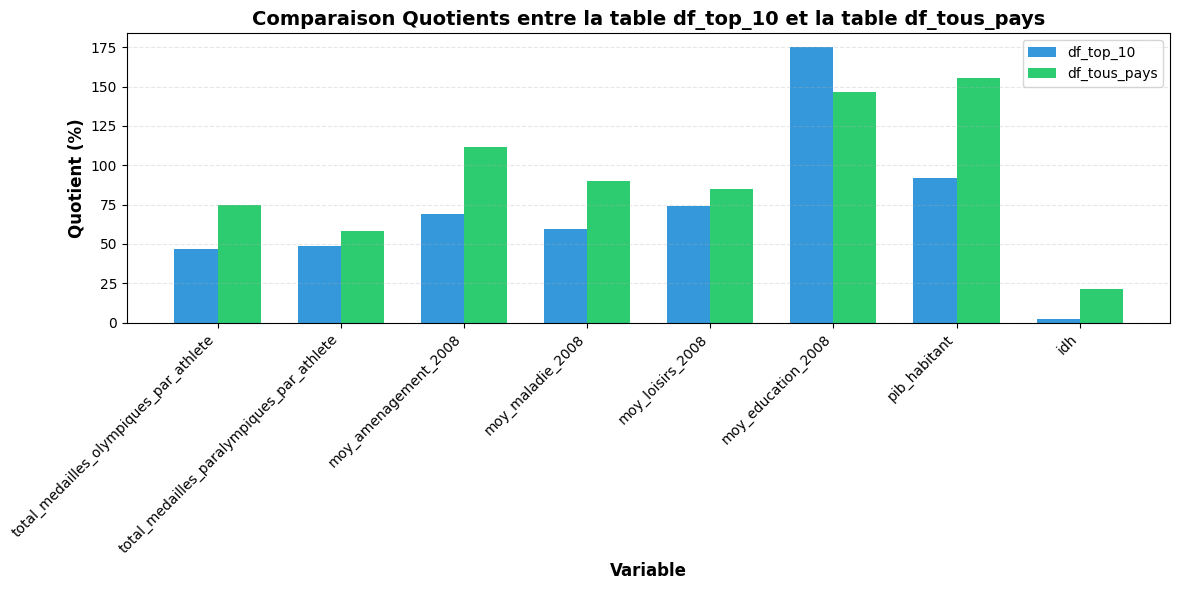

In [103]:
variables = df_cv_top_10['Variable'].values
cv_top10 = df_cv_top_10['Quotient (%)'].values
cv_tous_pays = df_quotient_tous_pays[df_quotient_tous_pays['Variable'].isin(variables)]['Quotient (%)'].values

#Créer le graphique
x = np.arange(len(variables))
largeur = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
barres1 = ax.bar(x - largeur/2, cv_top10, largeur, label='df_top_10', color='#3498db')
barres2 = ax.bar(x + largeur/2, cv_tous_pays, largeur, label='df_tous_pays', color='#2ecc71')

#Legende
ax.set_xlabel('Variable', fontsize=12, fontweight='bold')
ax.set_ylabel('Quotient (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparaison Quotients entre la table df_top_10 et la table df_tous_pays', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Cette sélection présente des résultats encourageants, tous les quotients ont diminué à l'exception de moyenne éducation qui a augmenté. Néanmoins, ils restent très importants et proches de 100. 
De plus, un autre problème va nous empêcher d'utiliser cette table.

<a id="nan"></a>
### Valeurs manquantes, la table df_top_10 devient inutilisable

Le problème de cette table, c'est que comme la plupart de ses pays sont non européens, les données de dépenses publiques en aménagement du territoire, santé et loisirs sont inaccessibles.

Calculons le pourcentage de valeurs manquantes de cette table (en ne conservant que les années olympiques) :

In [104]:
from statistiques_descriptives.valeurs_manquantes import pourcentage_valeurs_manquantes

pourcentage_valeurs_manquantes(df_top_10)

Variable  Pourcentage de valeurs manquantes
0      moy_maladie_2008                               60.0
1  moy_amenagement_2008                               60.0
2      moy_loisirs_2008                               60.0
3    moy_education_2008                               10.0
4    score_paralympique                                7.5
5       score_olympique                               12.5
6          pib_habitant                                0.0
7                   idh                               25.0

Et en comparant à df_tous_pays, on voit que le quotient est plus faible pour toutes les variables sauf la moyenne d'éducation.

<a id="bases"></a>
### La table idéale

60% de valeurs manquantes pour des variables explicatives, c'est beaucoup trop.

Voici alors une dernière table construite telle que : 
- On ne conserve que les pays ayant moins de 5 NaN entre 2008 et 2023
- On ne conserve que les pays ayant ramené en moyenne plus de cinq athlètes par jeux paralympiques 
- On prend les 10 au plus haut PIB par habitant

In [105]:
df_top_10_sans_NaN=pd.read_pickle('Toutes_les_df_agregees/df_top_10_sans_NaN.pkl')

pays = df_top_10_sans_NaN['pays'].unique()
print(f"Les pays de cette nouvelle table sont : \n{', '.join(pays)}")

df_stats=quotient(df_top_10_sans_NaN,df_tous_pays)
df_nan=pourcentage_valeurs_manquantes(df_top_10_sans_NaN)
df_complet = df_nan.merge(df_stats, on='Variable', how='outer')
df_complet = df_complet.fillna('/') #Les NaN ici seront juste les variables qui ne sont présentes que dans df_stats ou que dans df_nan

df_complet

Les pays de cette nouvelle table sont : 
Allemagne, Autriche, Belgique, Danemark, Finlande, France, Irlande, Italie, Pays-Bas, Suède


Variable  \
0                                        idh   
1                       moy_amenagement_2008   
2                         moy_education_2008   
3                           moy_loisirs_2008   
4                           moy_maladie_2008   
5                               pib_habitant   
6                            score_olympique   
7                         score_paralympique   
8     total_medailles_olympiques_par_athlete   
9  total_medailles_paralympiques_par_athlete   

  Pourcentage de valeurs manquantes        Moyenne Quotient (%) Observations  
0                              25.0       0.928744     2.872093        160.0  
1                               0.0    9628.052441   102.539084         40.0  
2                               5.0  295649.622192   119.737368         38.0  
3                               0.0   20021.665202    63.070577         40.0  
4                               0.0  169095.343365    78.353436         40.0  
5                               0.0   51606.477681     70.60631        170.0  
6                               5.0              /            /            /  
7                               0.0              /            /            /  
8                                 /       0.079586    30.750664         38.0  
9                                 /       0.336557    43.221863         40.0

En voilà des résultats satisfaisants, hormis l'IDH nous n'avons presque aucun NaN dans les variables explicatives. De plus, nous avons une quarantaine de couples (pays,année) lors des années olympiques ce qui est à peu près acceptable pour l'analyse.

 Les quotients restent de plus comparables à ceux de la table précédente, voirent diminuent :

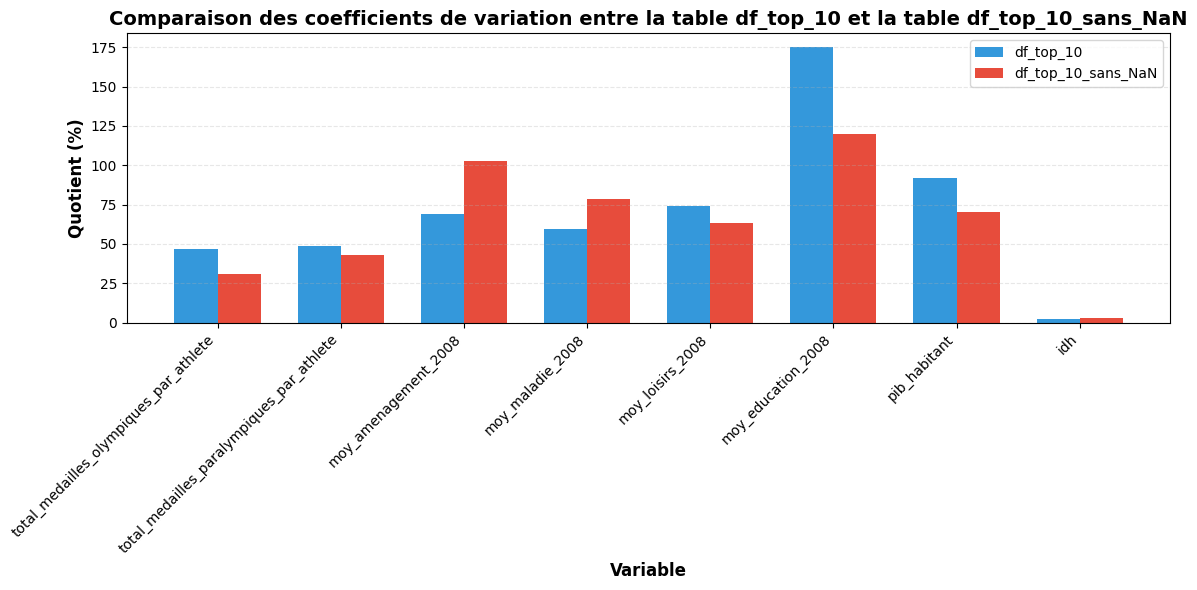

In [106]:
variables = df_cv_top_10['Variable'].values
cv_top10 = df_cv_top_10['Quotient (%)'].values
cv_stats = df_stats[df_stats['Variable'].isin(variables)]['Quotient (%)'].values

#Créer le graphique
x = np.arange(len(variables))
largeur = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
barres1 = ax.bar(x - largeur/2, cv_top10, largeur, label='df_top_10', color='#3498db')
barres2 = ax.bar(x + largeur/2, cv_stats, largeur, label='df_top_10_sans_NaN', color='#e74c3c')

#Legende
ax.set_xlabel('Variable', fontsize=12, fontweight='bold')
ax.set_ylabel('Quotient (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des coefficients de variation entre la table df_top_10 et la table df_top_10_sans_NaN', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Pour résumer, nous analyserons le lien entre réussite paralympique et caractéristiques nationales uniquement sur les dix pays européens les plus riches ayant amené un nombre convenable d'athlètes aux jeux.

In [ ]:
df=df_top_10_sans_NaN



Index(['pays', 'annee', 'athletes_olympiques', 'athletes_paralympiques', 'idh',
       'pib_habitant', 'or_olympique_par_athlete',
       'argent_olympique_par_athlete', 'bronze_olympique_par_athlete',
       'total_medailles_olympiques_par_athlete', 'or_paralympique_par_athlete',
       'argent_paralympique_par_athlete', 'bronze_paralympique_par_athlete',
       'total_medailles_paralympiques_par_athlete',
       'amenagement_territoire_par_habitant', 'loisirs_sports_par_habitant',
       'maladie_invalidite_par_habitant', 'education_par_habitant',
       'score_paralympique', 'score_olympique', 'moy_education_2008',
       'moy_loisirs_2008', 'moy_amenagement_2008', 'moy_maladie_2008'],
      dtype='object')

<a id="stat_desc"></a>
## Statistiques descriptives

Corrélation JO ↔ JP : 0.494


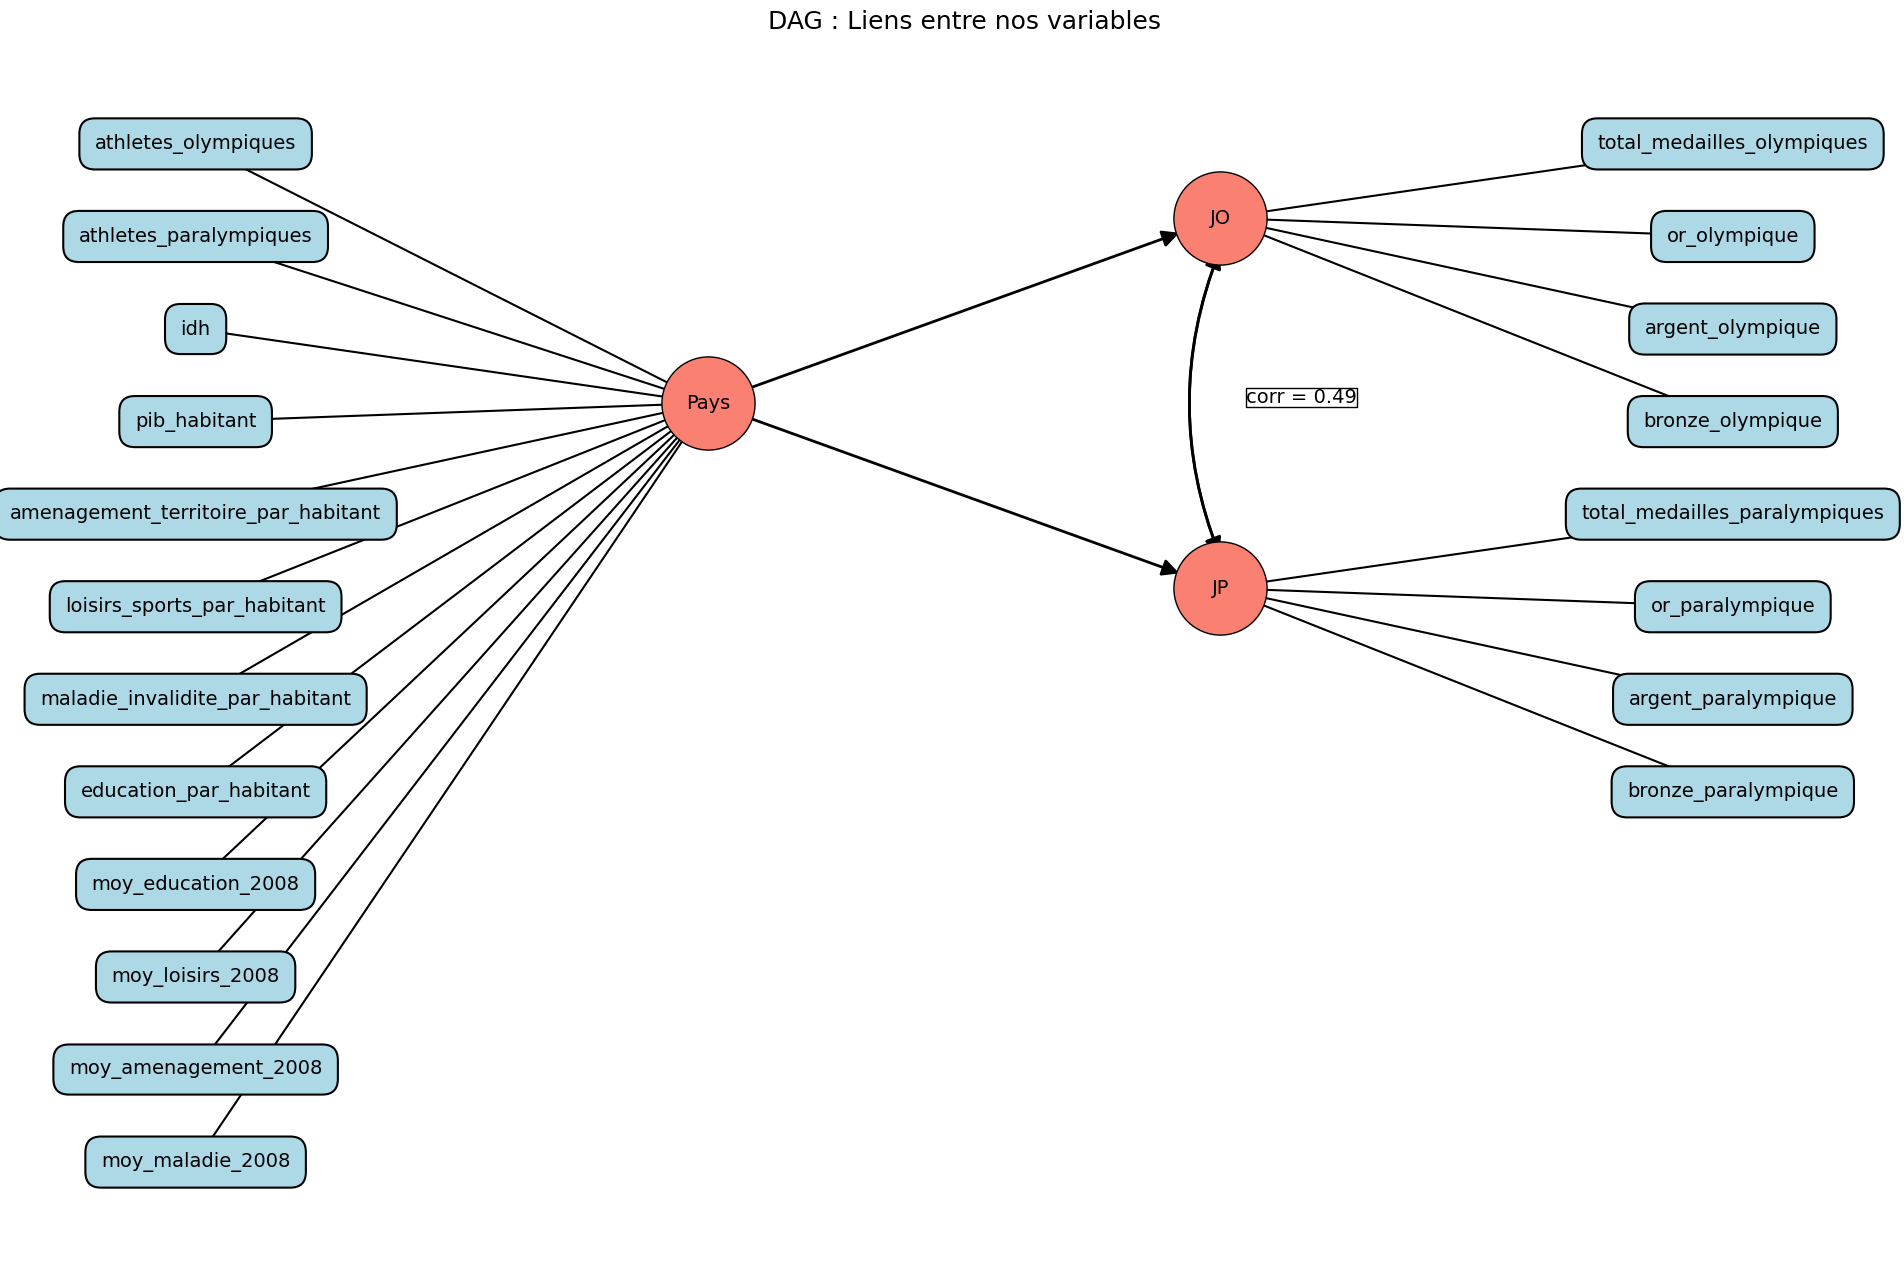

In [126]:
corr_jo_jp = (
    df[['total_medailles_olympiques_par_athlete', 'total_medailles_paralympiques_par_athlete']]
    .dropna()
    .corr()
    .loc['total_medailles_olympiques_par_athlete', 'total_medailles_paralympiques_par_athlete']
)

print(f"Corrélation JO ↔ JP : {corr_jo_jp:.3f}")
G = nx.DiGraph()

main_nodes = ["Pays", "JO", "JP"]
jo_vars = ["total_medailles_olympiques", "or_olympique", "argent_olympique", "bronze_olympique"]
jp_vars = ["total_medailles_paralympiques", "or_paralympique", "argent_paralympique", "bronze_paralympique"]
pays_vars = [
    "athletes_olympiques",
    "athletes_paralympiques",
    "idh",
    "pib_habitant",
    "amenagement_territoire_par_habitant",
    "loisirs_sports_par_habitant",
    "maladie_invalidite_par_habitant",
    'education_par_habitant',
    'moy_education_2008',
    'moy_loisirs_2008',
    'moy_amenagement_2008',
    'moy_maladie_2008'
]

G.add_nodes_from(main_nodes + jo_vars + jp_vars + pays_vars)

edges_jo = [("JO", v) for v in jo_vars]
edges_jp = [("JP", v) for v in jp_vars]
edges_pays = [("Pays", v) for v in pays_vars]

# -----------------------------
# Positions des nœuds
# -----------------------------
pos = {
    "Pays": np.array([0, 0]),
    "JO": np.array([4, 2]),
    "JP": np.array([4, -2])
}

for i, v in enumerate(jo_vars):
    pos[v] = np.array([8, 2 + 0.8 - i*1.0])
for i, v in enumerate(jp_vars):
    pos[v] = np.array([8, -1.2 - i*1.0])
for i, v in enumerate(pays_vars):
    pos[v] = np.array([-4, 2 + 0.8 - i*1.0])

# -----------------------------
# Affichage
# -----------------------------
plt.figure(figsize=(24, 16))
ax = plt.gca()

# --- Sous-variables arêtes normales ---
nx.draw_networkx_edges(G, pos, edgelist=edges_jo + edges_jp + edges_pays,
                       arrows=True, arrowstyle='-|>', arrowsize=20, width=1.5, edge_color="black")

# --- Ronds principaux ---
node_size_main = 4500
nx.draw_networkx_nodes(G, pos, nodelist=main_nodes, node_color="salmon",
                       node_shape="o", node_size=node_size_main, edgecolors="black")
nx.draw_networkx_labels(G, pos, labels={n: n for n in main_nodes}, font_size=14)

# --- Rectangles sous-variables ---
def draw_box(label, xy):
    ax.text(xy[0], xy[1], label, ha="center", va="center",
            fontsize=14,
            bbox=dict(boxstyle="round,pad=0.8", facecolor="lightblue",
                      edgecolor="black", linewidth=1.5))
for v in jo_vars + jp_vars + pays_vars:
    draw_box(v, pos[v])

# -----------------------------
# Flèches principales avec ajustement pour toucher les bords des cercles
# -----------------------------
def draw_arrow(src, dst, rad=0, color='black'):
    # Calcul décalage pour toucher bord
    start = pos[src]
    end = pos[dst]
    vec = end - start
    length = np.linalg.norm(vec)
    # rayon du cercle
    r = np.sqrt(node_size_main)/200  # ajusté empiriquement
    # décalage start/end
    start_adj = start + vec*(r/length)
    end_adj = end - vec*(r/length)
    arrow = FancyArrowPatch(start_adj, end_adj,
                            connectionstyle=f"arc3,rad={rad}",
                            arrowstyle='-|>', mutation_scale=25,
                            color=color, linewidth=2)
    ax.add_patch(arrow)

# Pays → JO et JP
draw_arrow("Pays", "JO")
draw_arrow("Pays", "JP")

# Double flèche JO ↔ JP
draw_arrow("JO", "JP", rad=0.2)
draw_arrow("JP", "JO", rad=-0.2)

# Étiquette corrélation
ax.text((pos["JO"][0] + pos["JP"][0])/2 + 0.2,
        (pos["JO"][1] + pos["JP"][1])/2,
        f"corr = {corr_jo_jp:.2f}",
        fontsize=14,
        bbox=dict(facecolor="white", edgecolor="black", pad=0.3))

plt.title("DAG : Liens entre nos variables", fontsize=18)
plt.axis("off")
plt.show()


Le diagramme acyclique orienté ci-dessus donne une idée des liens entre nos différentes variables. Nous allons tenter de les décrire statistiquement.

Avant l'analyse des données, observons le comportement des variables. Le tracé de l'évolution temporelle de certaines variables nous permettra de définir le champ de l'étude différemment. Puis des nuages de points et une matrice de corrélation entre statistiques explicatives et à expliquer nous donneront un aperçu de l'analyse.

<a id="evolution"></a>
### Evolution temporelle des variables

Tout d'abord, traçons l'évolution de l'IDH au fil des années :

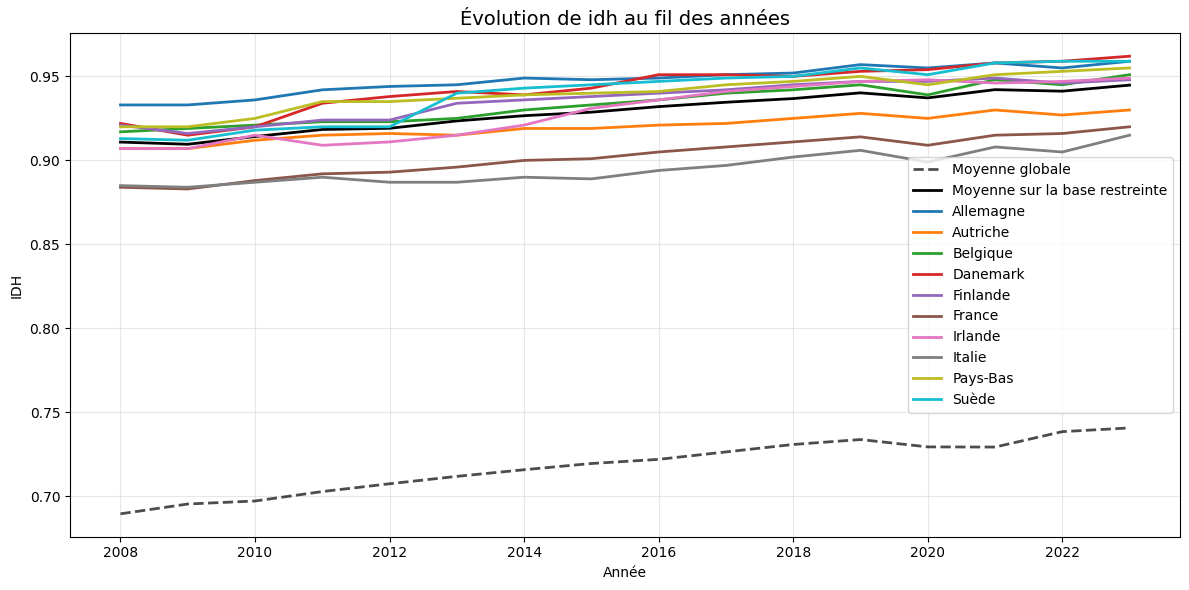

In [ ]:
from statistiques_descriptives.evolution import plot_evolution


plot_evolution(df,'idh',(df['pays'].unique()),nom_axe = 'IDH', moyenne=True, df_all=df_tous_pays)

On voit que la variation d'IDH entre les pays est de moins de 0.1. De plus, tous les IDH ont une croissance similaire. Dans tous les cas, ces IDH sont très proches comparés à la moyenne mondiale (ici en pointillés). Il sera alors très difficile d'observer précisément toute corrélation concernant l'IDH.

Pour le PIB par habitant, le graphique suivant montre que tous les pays sélectionnés sont bien plus riches que la moyenne. Ce qui est normal compte-tenu de la construction de la base. Le PIB par habitant varie cependant plus entre les pays que l'IDH avec notamment l'Irlande qui est loin devant le reste de la base.

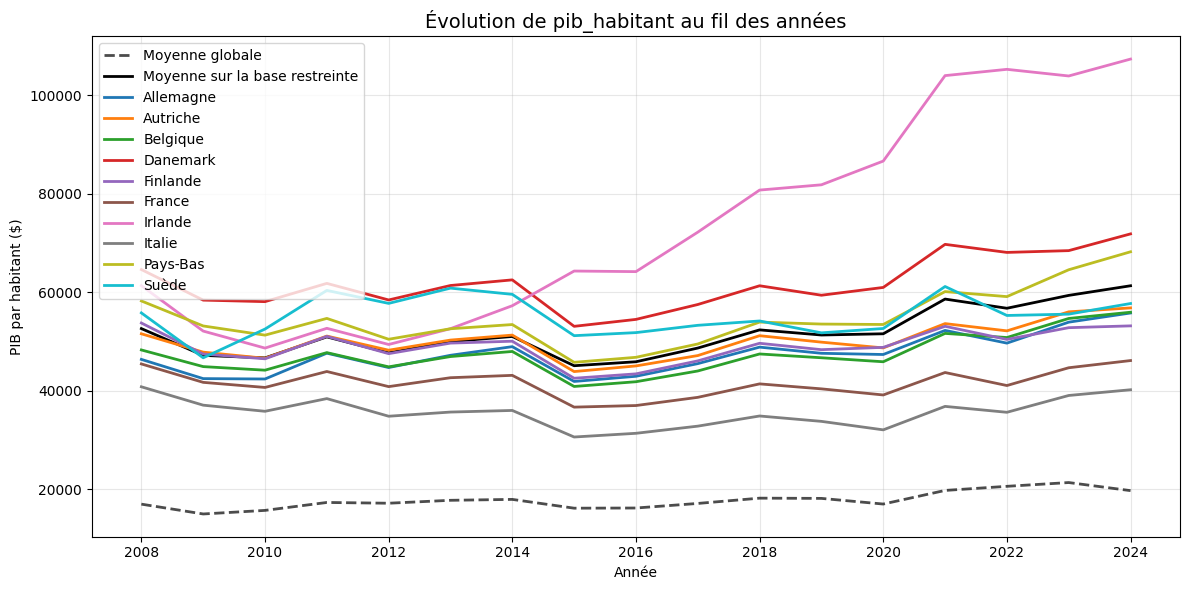

In [ ]:
plot_evolution(df,'pib_habitant',(df['pays'].unique()),nom_axe = 'PIB par habitant ($)', moyenne=True, df_all=df_tous_pays)

Observons maintenant les variables de dépense par habitant :

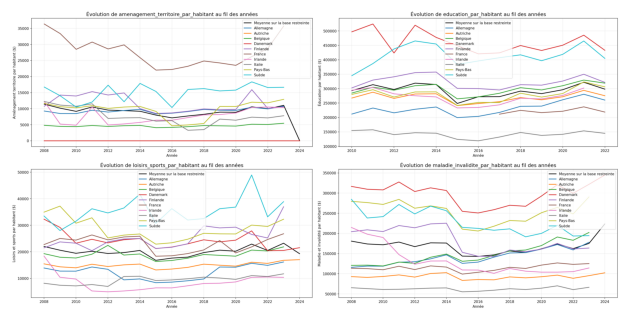

In [ ]:
from statistiques_descriptives.combinaison_images import combiner_images

plot_evolution(df, 'amenagement_territoire_par_habitant', list(df['pays'].unique()), 'Aménagement territoire par habitant ($)', True,filepath='images/amenagement')
plot_evolution(df, 'loisirs_sports_par_habitant', list(df['pays'].unique()), 'Loisirs et sports par habitant ($)', True,filepath='images/loisirs')
plot_evolution(df, 'maladie_invalidite_par_habitant', list(df['pays'].unique()), 'Maladie et invalidité par habitant ($)', True,filepath='images/maladie')
plot_evolution(df, 'education_par_habitant', list(df['pays'].unique()), 'Éducation par habitant ($)', True,filepath='images/education')

combiner_images('images')

Il n'est pas nécessaire d'observer la figure en détail pour voir que excepté pour l'éducation, les variables ont des dynamiques très différentes entre les pays. A priori, ce seront pour ces variables que les résultats seront les plus précis.

Enfin, on peut observer les résultats paralympiques entre les pays selon les années.

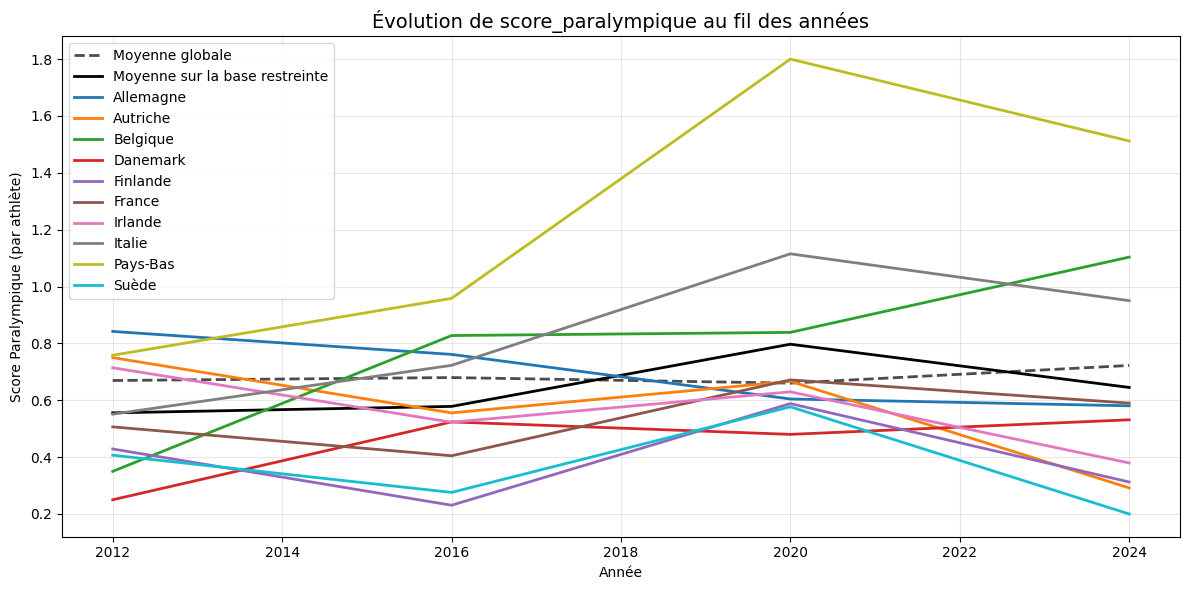

In [ ]:
plot_evolution(df,'score_paralympique',(df['pays'].unique()),nom_axe = 'Score Paralympique (par athlète)', moyenne=True, df_all=df_tous_pays)

Le score olympique varie énormément entre les pays. On y distingue trois dynamiques : 
- Les pays ayant perdu en score en 2016 puis étant remonté en 2020 pour redescendre (Suède, Finlande, Autriche...) 
- Les pays n'ayant fait globalement que monter légèrement leur score depuis 2012 (Italie, Belgique, Danemark...) 
- les Pays-Bas qui se sont remarquablement éloignés de la masse depuis 2020

On voit de plus que les pays de la base ne sont pas spécialement plus performants que le reste du monde en voyant l'écart par rapport à la moyenne globale.

<a id="nuages"></a>
### Nuages de points

Ayant vu que c'est surtout les dépenses publiques par habitant qui varient d'un pays à l'autre, regardons si les nuages de points entre score_paralympique et dépenses publiques peuvent présager de bons résultats dans la partie "Analyse".

Désormais, et pour toute la suite, quand on parlera de dépense, on ne parlera que des dépenses publiques moyennes par habitant depuis 2008.

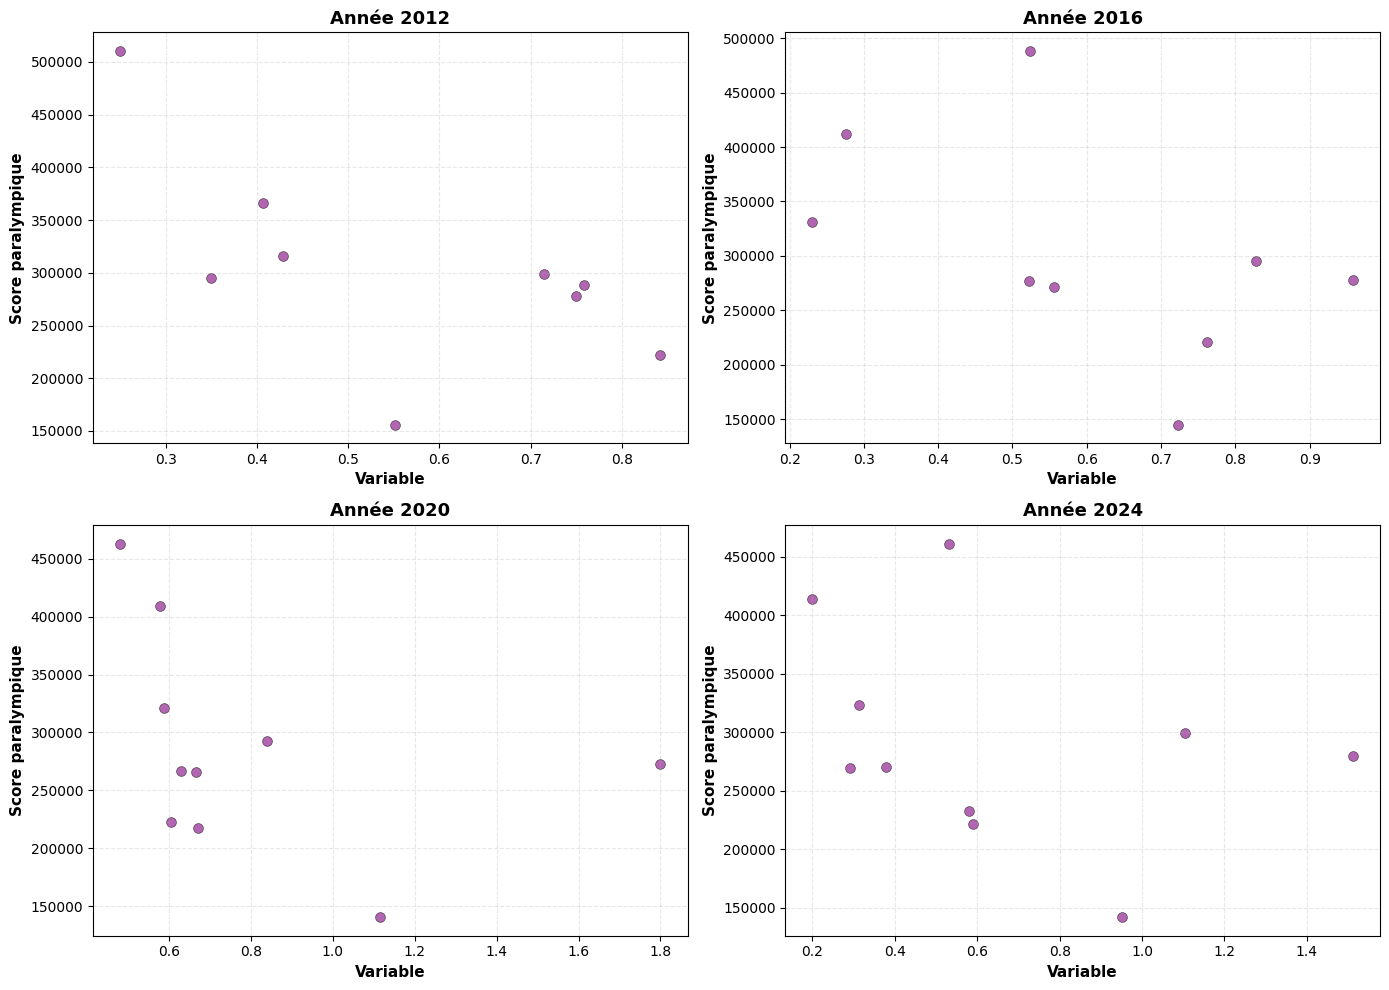

In [136]:
nuage_points("moy_education_2008",df)

In [ ]:
nuage_points("moy_loisirs_2008",df)

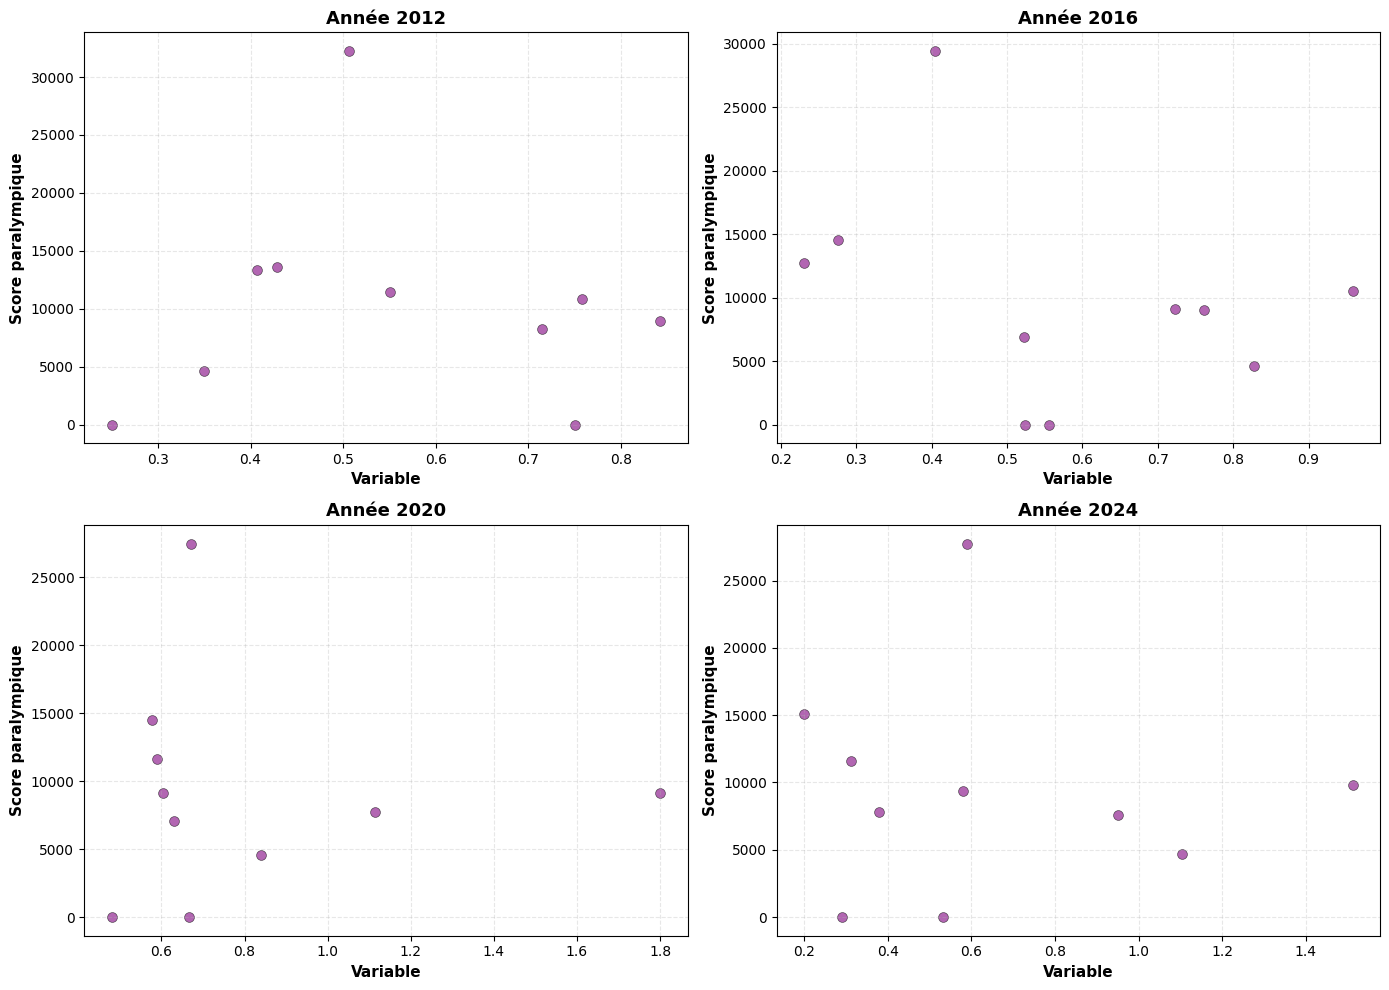

In [137]:
nuage_points("moy_amenagement_2008",df)

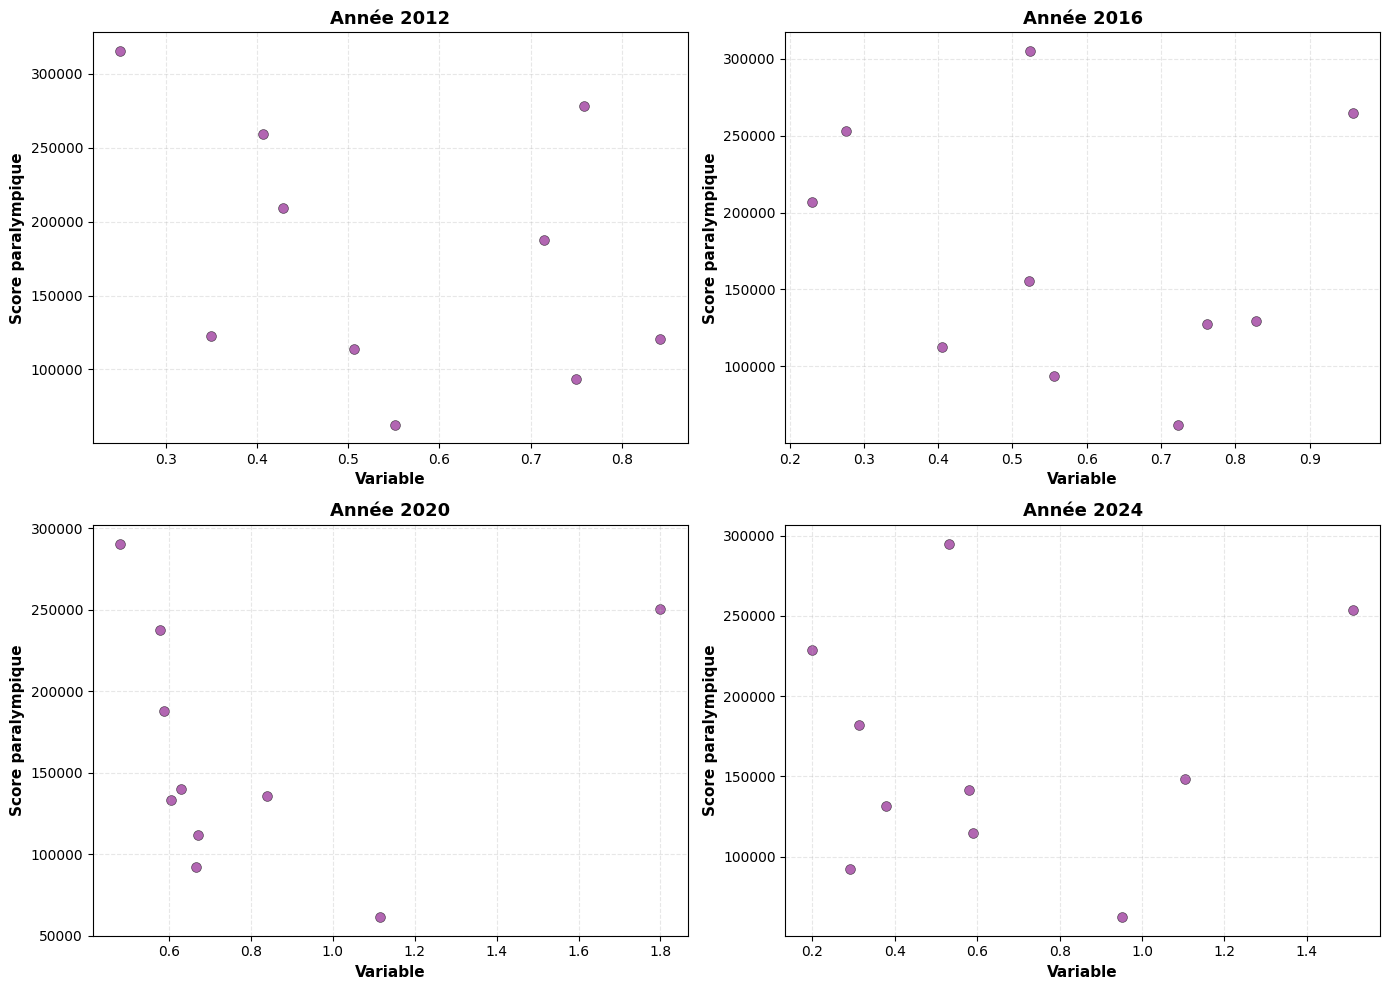

In [138]:
nuage_points("moy_maladie_2008",df)

explications

==== MATRICE DE CORRÉLATION (valeurs arrondies et noms raccourcis) ====

Logique de calcul :
- Les colonnes de résultats olympiques/paralympiques ne sont disponibles que tous les 4 ans (années de JO).
- La corrélation est calculée entre le résultat de l'année x et la moyenne des autres variables sur toutes les années précédentes.



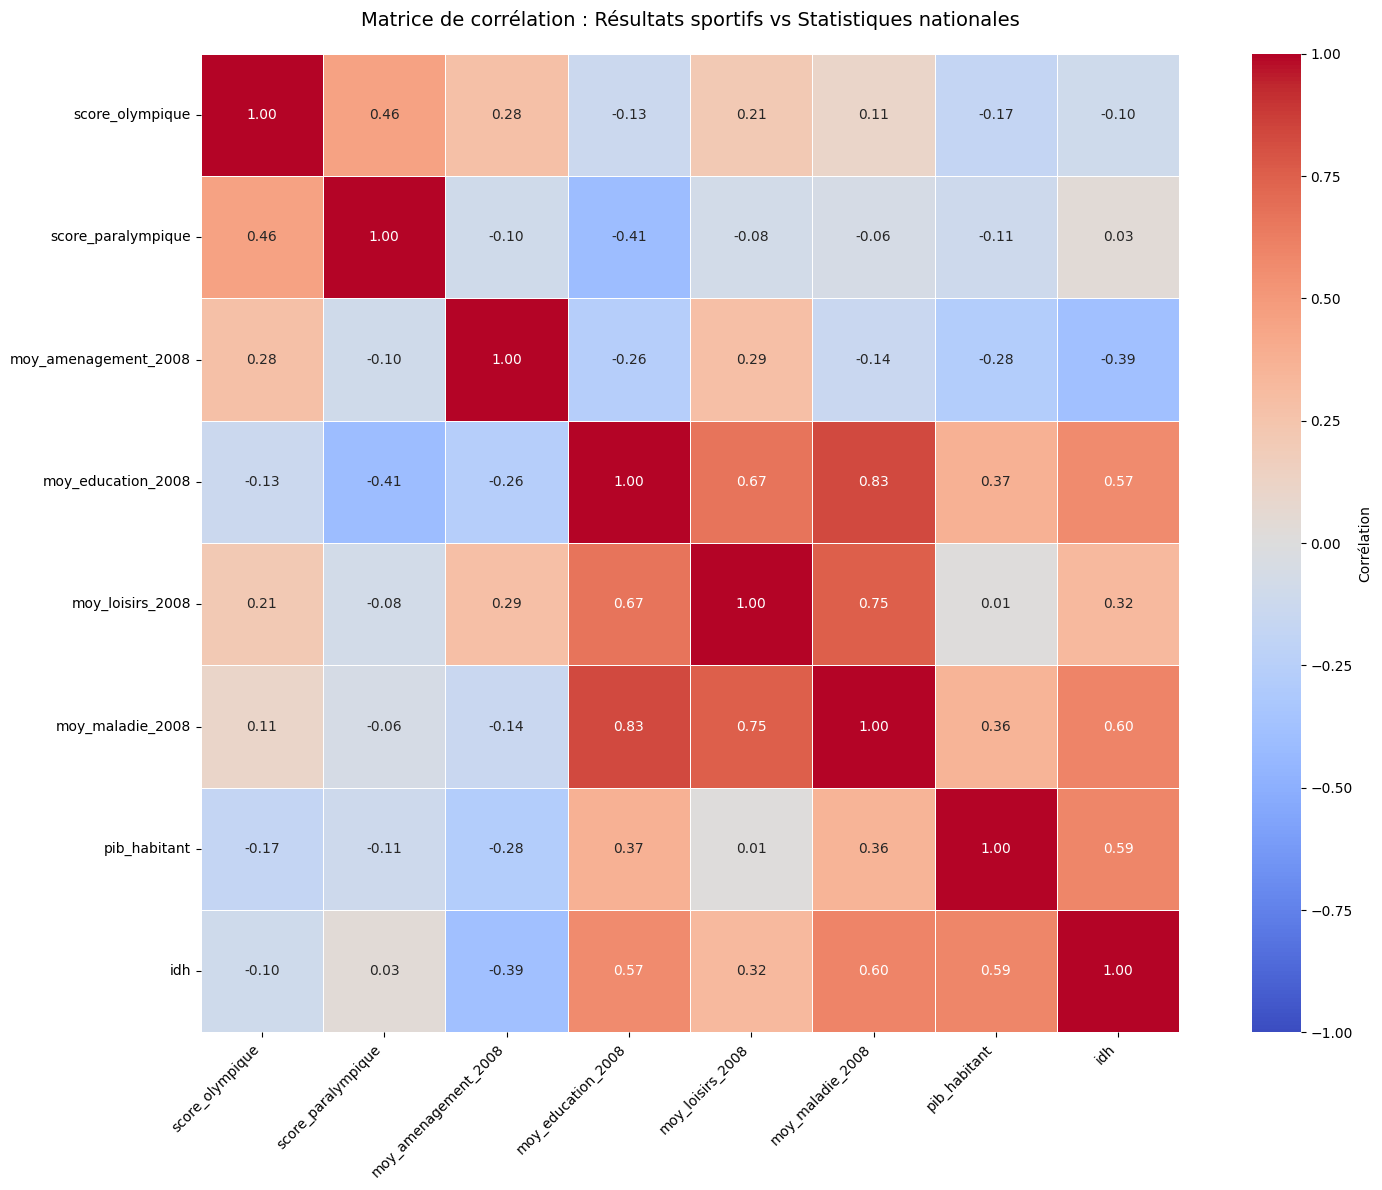

score_olympique  score_paralympique  \
score_olympique                 1.000               0.455   
score_paralympique              0.455               1.000   
moy_amenagement_2008            0.278              -0.095   
moy_education_2008             -0.131              -0.407   
moy_loisirs_2008                0.211              -0.083   
moy_maladie_2008                0.106              -0.056   
pib_habitant                   -0.173              -0.112   
idh                            -0.103               0.032   

                      moy_amenagement_2008  moy_education_2008  \
score_olympique                      0.278              -0.131   
score_paralympique                  -0.095              -0.407   
moy_amenagement_2008                 1.000              -0.261   
moy_education_2008                  -0.261               1.000   
moy_loisirs_2008                     0.289               0.667   
moy_maladie_2008                    -0.141               0.835   
pib_habitant                        -0.276               0.374   
idh                                 -0.388               0.566   

                      moy_loisirs_2008  moy_maladie_2008  pib_habitant    idh  
score_olympique                  0.211             0.106        -0.173 -0.103  
score_paralympique              -0.083            -0.056        -0.112  0.032  
moy_amenagement_2008             0.289            -0.141        -0.276 -0.388  
moy_education_2008               0.667             0.835         0.374  0.566  
moy_loisirs_2008                 1.000             0.751         0.012  0.321  
moy_maladie_2008                 0.751             1.000         0.359  0.598  
pib_habitant                     0.012             0.359         1.000  0.586  
idh                              0.321             0.598         0.586  1.000

In [135]:
matrice_correlation(df)

explications

analyses / modélisation / conclusion